In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
df = pd.read_excel('data/cleaned_data.xlsx', index_col=0, header=1)
df = df.reset_index(drop=False)
df.head()

,no,q1 (성별),q2_1 (나이),E/I,S/N,T/F,P/J,w7,w8,w9,w10,q13_1,l14_1 (무지외반증),l14_2(무좀),l14_3(내성발톱),l14_4(발가락 한 개가 유달리 길어서 양말에 구멍이 자주 난다.),l14_5 (발등이 높은 편이다.),l14_6 (발볼이 넓은 편이다.),l14_7 (뒤꿈치가 평평해서 새신발 신을 때 잘 까진다.),l14_8 (평발이다.),l14_9 (왕발이라 잘 맞는 신발이랑 양말 찾기가 어렵다.),l14_10 (발이 너무 작아서 신발이랑 양말 찾기가 어렵다.),l14_11 (해당사항 없음),l15,l16,l17,l18,l19,l20,l21,l22,l23,l37,l38,l39,l40,l41,개성지향,과시지향,운동지향,의복추구_실용성,의복추구_외모,SNS 개인,SNS 즐거움,관여도,q11_1,q11_2,q11_3,q11_4,q11_5,q11_6,q11_7,q11_8,q12_1,q12_2,q12_3,q12_4,q12_5,q12_6,q12_7,q12_8,q12_9,q68_1,q68_2,q68_3,q68_4,q68_5,q68_6,q68_7,q68_8,q69_1,q69_2,q69_3,q69_4,q69_5,q69_6,q69_7,q69_8,q69_9
0,2,2,33,I,S,T,P,1,2,2,4,240,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,6.0,7.0,8.0,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,6.0,7.0,8.0,NaN
1,2,2,33,I,S,T,P,1,2,2,4,240,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,33,I,S,T,P,1,2,2,4,240,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,33,I,S,T,P,1,2,2,4,240,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,33,I,S,T,P,1,2,2,4,240,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Get the unique values in the 'no' column
unique_values = df['no'].unique()

# List to store the indices of the first occurrence of each unique value
indexes_to_drop = []

# Loop through unique values and find the first occurrence of each value
for value in unique_values:
    index = df[df['no'] == value].index[0]  # Get the index of the first occurrence of the value
    indexes_to_drop.append(index)

#Drop the rows with the identified indices
df.drop(indexes_to_drop, inplace=True)

In [71]:
null_counts = df.isnull().sum()
print(null_counts)

no              0
q1 (성별)         0
q2_1 (나이)       0
E/I             0
S/N             0
             ... 
q69_5        3645
q69_6        3603
q69_7        3617
q69_8        3499
q69_9        3635
Length: 79, dtype: int64


In [72]:
#fillna() NaN 결측치 값을 0으로 바꿔주는 것
df = df.fillna(0)

In [73]:
# 1 MBTI Binary
# ESTP -> 1로

mbti = ['E/I', 'S/N', 'T/F', 'P/J']


for col in mbti:
    df[col] = df[col].apply(lambda x: 1 if x == 'E' else 
                            (1 if x == 'S' else 
                             (1 if x == 'T' else 
                              (1 if x == 'P' else 
                               0))))


df.head()

,no,q1 (성별),q2_1 (나이),E/I,S/N,T/F,P/J,w7,w8,w9,w10,q13_1,l14_1 (무지외반증),l14_2(무좀),l14_3(내성발톱),l14_4(발가락 한 개가 유달리 길어서 양말에 구멍이 자주 난다.),l14_5 (발등이 높은 편이다.),l14_6 (발볼이 넓은 편이다.),l14_7 (뒤꿈치가 평평해서 새신발 신을 때 잘 까진다.),l14_8 (평발이다.),l14_9 (왕발이라 잘 맞는 신발이랑 양말 찾기가 어렵다.),l14_10 (발이 너무 작아서 신발이랑 양말 찾기가 어렵다.),l14_11 (해당사항 없음),l15,l16,l17,l18,l19,l20,l21,l22,l23,l37,l38,l39,l40,l41,개성지향,과시지향,운동지향,의복추구_실용성,의복추구_외모,SNS 개인,SNS 즐거움,관여도,q11_1,q11_2,q11_3,q11_4,q11_5,q11_6,q11_7,q11_8,q12_1,q12_2,q12_3,q12_4,q12_5,q12_6,q12_7,q12_8,q12_9,q68_1,q68_2,q68_3,q68_4,q68_5,q68_6,q68_7,q68_8,q69_1,q69_2,q69_3,q69_4,q69_5,q69_6,q69_7,q69_8,q69_9
1,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df = df.drop(columns= 'no', axis=1)

In [74]:
#68, 69번 문항 Drop하기

df_tail_cut = df 
# 68번 문항 없애기
for cols in range(1,9):
    df_tail_cut = df_tail_cut.drop(columns=f'q68_{cols}')

# 69번 문항 없애기
for cols in range(1,10):
    df_tail_cut = df_tail_cut.drop(columns=f'q69_{cols}')

df_tail_cut.shape


(3670, 62)

In [87]:
df_reset = df_tail_cut.reset_index(drop=True)
df_reset.head()

,no,q1 (성별),q2_1 (나이),E/I,S/N,T/F,P/J,w7,w8,w9,w10,q13_1,l14_1 (무지외반증),l14_2(무좀),l14_3(내성발톱),l14_4(발가락 한 개가 유달리 길어서 양말에 구멍이 자주 난다.),l14_5 (발등이 높은 편이다.),l14_6 (발볼이 넓은 편이다.),l14_7 (뒤꿈치가 평평해서 새신발 신을 때 잘 까진다.),l14_8 (평발이다.),l14_9 (왕발이라 잘 맞는 신발이랑 양말 찾기가 어렵다.),l14_10 (발이 너무 작아서 신발이랑 양말 찾기가 어렵다.),l14_11 (해당사항 없음),l15,l16,l17,l18,l19,l20,l21,l22,l23,l37,l38,l39,l40,l41,개성지향,과시지향,운동지향,의복추구_실용성,의복추구_외모,SNS 개인,SNS 즐거움,관여도,q11_1,q11_2,q11_3,q11_4,q11_5,q11_6,q11_7,q11_8,q12_1,q12_2,q12_3,q12_4,q12_5,q12_6,q12_7,q12_8,q12_9
0,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
4,2,2,33,0,1,1,1,1,2,2,4,240,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,1,1,4,1,2,3,2,5,4,2,1,3.0,2.5,3.0,4.0,3.2,1.0,3.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [88]:
# 결과값들이 0인 행 삭제 
df_reset = df_reset[~((df_reset['q11_3'] == 0) & (df_reset['q11_4'] == 0)
                       & (df_reset['q11_5'] == 0) & (df_reset['q11_6'] == 0)
                       & (df_reset['q11_7'] == 0) & (df_reset['q11_8'] == 0)
                       & (df_reset['q12_2'] == 0)
                       & (df_reset['q12_3'] == 0) & (df_reset['q12_4'] == 0)
                       & (df_reset['q12_5'] == 0) & (df_reset['q12_6'] == 0)
                       & (df_reset['q12_8'] == 0) & (df_reset['q12_9'] == 0)
                       )]

In [89]:
# Min-Max 정규화 
df_normal = (df_reset - df_reset.min()) / (df_reset.max() - df_reset.min())
df_normal

,no,q1 (성별),q2_1 (나이),E/I,S/N,T/F,P/J,w7,w8,w9,w10,q13_1,l14_1 (무지외반증),l14_2(무좀),l14_3(내성발톱),l14_4(발가락 한 개가 유달리 길어서 양말에 구멍이 자주 난다.),l14_5 (발등이 높은 편이다.),l14_6 (발볼이 넓은 편이다.),l14_7 (뒤꿈치가 평평해서 새신발 신을 때 잘 까진다.),l14_8 (평발이다.),l14_9 (왕발이라 잘 맞는 신발이랑 양말 찾기가 어렵다.),l14_10 (발이 너무 작아서 신발이랑 양말 찾기가 어렵다.),l14_11 (해당사항 없음),l15,l16,l17,l18,l19,l20,l21,l22,l23,l37,l38,l39,l40,l41,개성지향,과시지향,운동지향,의복추구_실용성,의복추구_외모,SNS 개인,SNS 즐거움,관여도,q11_1,q11_2,q11_3,q11_4,q11_5,q11_6,q11_7,q11_8,q12_1,q12_2,q12_3,q12_4,q12_5,q12_6,q12_7,q12_8,q12_9
0,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0
3,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0
5,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
15,0.003645,1.0,0.517241,1.0,1.0,0.0,1.0,0.5,0.50,1.00,0.25,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.50,0.50,1.0,0.25,1.0,0.0,0.0,0.4175,0.375,0.3325,0.399399,0.45,0.375,0.625,0.35,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3652,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0
3653,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0
3654,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0


In [90]:
# 결과 열 따로 분리 
# q11_1~8, q12_1~9
# 삭제 : 11_1,2 / 12_1  / 12_7 
# 결합 : 11_4,5,6  / 12_2,5  / 12_3,6  

ach_columns = ['q11_1', 'q11_2', 'q11_3', 'q11_4', 'q11_5', 'q11_6', 'q11_7', 'q11_8'] 
col_columns = [ 'q12_1', 'q12_2', 'q12_3', 'q12_4', 'q12_5', 'q12_6', 'q12_7', 'q12_8', 'q12_9']
label_columns = ['l15', 'l16', 'l17', 'l18','l19', 'l20', 'l21', 'l22','l23', 'l37', 'l38', 'l39', 'l40', 'l41']

In [92]:
# 무채색만 결과값
X = df_normal.drop(columns=ach_columns + col_columns) #+ label_columns)
y = df_normal[['q11_3', 'q11_4', 'q11_5', 'q11_6', 'q11_7', 'q11_8',
              'q12_2', 'q12_3', 'q12_4', 'q12_5', 'q12_6', 'q12_8', 'q12_9']]
y

,q11_3,q11_4,q11_5,q11_6,q11_7,q11_8,q12_2,q12_3,q12_4,q12_5,q12_6,q12_8,q12_9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [93]:
X

,no,q1 (성별),q2_1 (나이),E/I,S/N,T/F,P/J,w7,w8,w9,w10,q13_1,l14_1 (무지외반증),l14_2(무좀),l14_3(내성발톱),l14_4(발가락 한 개가 유달리 길어서 양말에 구멍이 자주 난다.),l14_5 (발등이 높은 편이다.),l14_6 (발볼이 넓은 편이다.),l14_7 (뒤꿈치가 평평해서 새신발 신을 때 잘 까진다.),l14_8 (평발이다.),l14_9 (왕발이라 잘 맞는 신발이랑 양말 찾기가 어렵다.),l14_10 (발이 너무 작아서 신발이랑 양말 찾기가 어렵다.),l14_11 (해당사항 없음),l15,l16,l17,l18,l19,l20,l21,l22,l23,l37,l38,l39,l40,l41,개성지향,과시지향,운동지향,의복추구_실용성,의복추구_외모,SNS 개인,SNS 즐거움,관여도
0,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60
2,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60
3,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60
5,0.000000,1.0,0.448276,0.0,1.0,1.0,1.0,0.0,0.25,0.25,0.75,0.375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.25,0.50,1.0,1.00,1.0,0.5,0.0,0.5000,0.375,0.5000,0.699700,0.55,0.000,0.500,0.60
15,0.003645,1.0,0.517241,1.0,1.0,0.0,1.0,0.5,0.50,1.00,0.25,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.50,0.50,1.0,0.25,1.0,0.0,0.0,0.4175,0.375,0.3325,0.399399,0.45,0.375,0.625,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05
3652,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05
3653,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05
3654,0.997570,1.0,0.310345,0.0,1.0,0.0,1.0,0.0,0.00,0.75,0.00,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.75,0.25,1.0,0.00,1.0,0.0,0.0,0.2500,0.000,0.2500,0.699700,0.10,0.000,0.000,0.05


In [94]:
y

,q11_3,q11_4,q11_5,q11_6,q11_7,q11_8,q12_2,q12_3,q12_4,q12_5,q12_6,q12_8,q12_9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
# 원핫 인코딩 재결합

y['socks'] =y.idxmax(axis=1)
y.drop(y.columns[:-1], axis=1, inplace=True)
y

,socks
0,q11_5
2,q12_4
3,q12_6
5,q12_8
15,q11_3
...,...
3651,q12_2
3652,q12_4
3653,q12_6
3654,q12_8


In [96]:
# 삭제 : 11_1,2 / 12_1  / 12_7 
# 결합 : 11_4,5,6  / 12_2,5  / 12_3,6  

y['socks'].replace('q11_4', 'q11_9', inplace = True)
y['socks'].replace('q11_5', 'q11_9', inplace = True)
y['socks'].replace('q11_6', 'q11_9', inplace = True)

y['socks'].replace('q12_2', 'q12_20', inplace = True)
y['socks'].replace('q12_5', 'q12_20', inplace = True)

y['socks'].replace('q12_3', 'q12_30', inplace = True)
y['socks'].replace('q12_6', 'q12_30', inplace = True)

y['socks']

0        q11_9
2        q12_4
3       q12_30
5        q12_8
15       q11_3
         ...  
3651    q12_20
3652     q12_4
3653    q12_30
3654     q12_8
3667     q12_4
Name: socks, Length: 1030, dtype: object

In [52]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 수행
y_encoded = label_encoder.fit_transform(y)

print(y_encoded)

[ 4  8 11 ... 15  1 11]


In [97]:
import plotly.express as px

fig = px.histogram(y)
fig.update_layout(width=800, height =450)
fig.show()

In [98]:
# 학습용과 테스트용으로 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_encoded, test_size=0.2, random_state=42)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 결정 트리 분류기
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [100]:
# 다중 출력 문제 학습
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
y_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

In [103]:
print(np.unique(y_pred))
print(np.unique(rf_pred))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [104]:
y_pred

array([ 1,  1,  0,  2, 13,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  2,
        0,  1,  1,  2,  7,  2,  0,  0,  0,  2,  0,  3,  0,  2,  0,  4,  0,
        5,  0,  1,  2,  1,  0,  0,  0,  2,  0,  0,  1,  1,  0,  1,  0,  0,
       15,  0,  0,  2,  0,  0,  1,  6,  0,  0,  2,  1,  9,  1,  0,  0, 11,
        2,  0, 14,  2,  2,  0,  8, 10,  6,  0,  1,  1, 12,  2,  2,  1,  0,
        1,  1,  9,  8,  1,  2,  2,  1,  8,  4,  1,  0,  0,  0,  8,  8,  0,
        0,  0,  7,  7,  0,  1,  0,  8,  2,  1,  1,  0,  0,  0,  5,  0,  3,
        0,  1,  2,  1,  1,  8,  0,  1,  6,  0,  0,  1,  1,  0,  1,  0,  4,
        8,  2, 15,  1,  1,  1, 14,  1,  1,  0,  0,  6,  5,  0,  1,  1,  3,
       15,  8,  0,  0,  6,  0,  4,  2,  2,  1,  0,  6,  2,  0,  2,  8,  0,
        1,  1,  2,  6,  1,  6,  0, 12,  1,  4,  4,  0, 15,  1,  6,  0,  2,
        8,  7,  2,  2,  0,  0,  0,  1,  2,  8,  1,  7, 10,  1,  2,  1,  5,
        2,  1,  0,  7,  0,  1,  2, 13,  1,  6,  0,  1,  2,  2,  1,  0,  9,
        2, 12,  6, 15,  1

In [105]:
from sklearn.metrics import accuracy_score


accuracy = dt.score(X_test, y_test)
accuracy_rf = rf.score(X_test, y_test)

print('DT train Accuracy', dt.score(X_train, y_train))
print('DT Accuracy :', accuracy)
print('rf train Accuracy', rf.score(X_train, y_train))
print('rf Accuracy :', accuracy_rf)

DT train Accuracy 0.3145506419400856
DT Accuracy : 0.002849002849002849
rf train Accuracy 0.3145506419400856
rf Accuracy : 0.0


In [29]:
import matplotlib.font_manager as fm

# 한글 폰트 경로
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로

# 한글 폰트 등록
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)


0.002849002849002849

In [31]:
#confusion Matrix
import seaborn as sns

unique_labels = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

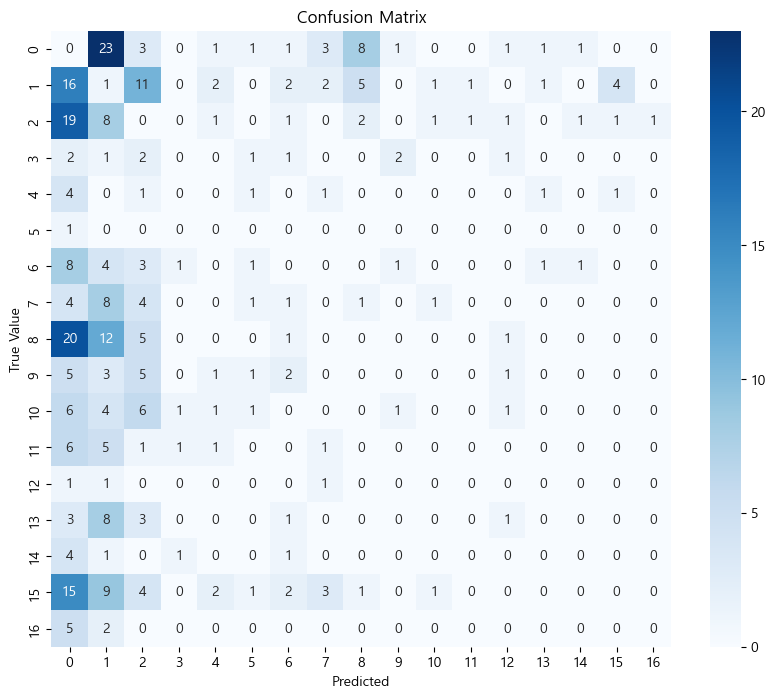

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
           xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

In [144]:
from sklearn.tree import plot_tree

plt.figure(dpi=2000)  # dpi를 300으로 설정 (높은 해상도)
plt.figure(figsize=(60,28))
plot_tree(dt, max_depth =2, filled=True, feature_names=X_train.columns)   # full decision tree
plt.savefig('images/dt_fulldata.jpg')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 12800x9600 with 0 Axes>

<Figure size 6000x2800 with 0 Axes>

In [187]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


In [188]:
# 모델 정의
num_input_features = 44
num_output_features = 17

model = Sequential([
    Dense(100, activation='relu', input_shape=(num_input_features,)),
    Dropout(0.3),  # 추가적인 Dropout 레이어
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    
    Dense(num_output_features, activation='softmax')  
])


In [189]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               4500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 17)                1717      
                                                                 
Total params: 26417 (103.19 KB)
Trainable params: 2641

In [190]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 다중 클래스 분류에 적합한 손실 함수
              metrics=['accuracy'])

In [191]:
# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2)

Epoch 1/50
57/57 [==============================] - 1s 3ms/step - loss: 2.7036 - accuracy: 0.0972 - val_loss: 2.5482 - val_accuracy: 0.1459
Epoch 2/50
57/57 [==============================] - 0s 1ms/step - loss: 2.6191 - accuracy: 0.1293 - val_loss: 2.5361 - val_accuracy: 0.1388
Epoch 3/50
57/57 [==============================] - 0s 1ms/step - loss: 2.6019 - accuracy: 0.1383 - val_loss: 2.5084 - val_accuracy: 0.1246
Epoch 4/50
57/57 [==============================] - 0s 1ms/step - loss: 2.5811 - accuracy: 0.1383 - val_loss: 2.5055 - val_accuracy: 0.1281
Epoch 5/50
57/57 [==============================] - 0s 1ms/step - loss: 2.5661 - accuracy: 0.1418 - val_loss: 2.5375 - val_accuracy: 0.1317
Epoch 6/50
57/57 [==============================] - 0s 1ms/step - loss: 2.5426 - accuracy: 0.1543 - val_loss: 2.5065 - val_accuracy: 0.1495
Epoch 7/50
57/57 [==============================] - 0s 1ms/step - loss: 2.5337 - accuracy: 0.1445 - val_loss: 2.5227 - val_accuracy: 0.1495
Epoch 8/50
57/57 [==

In [192]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

11/11 [==============================] - 0s 800us/step - loss: 3.1019 - accuracy: 0.0570
Test accuracy: 0.056980058550834656
